# Problem Statement
The task is to automate the categorization of famous landmarks.

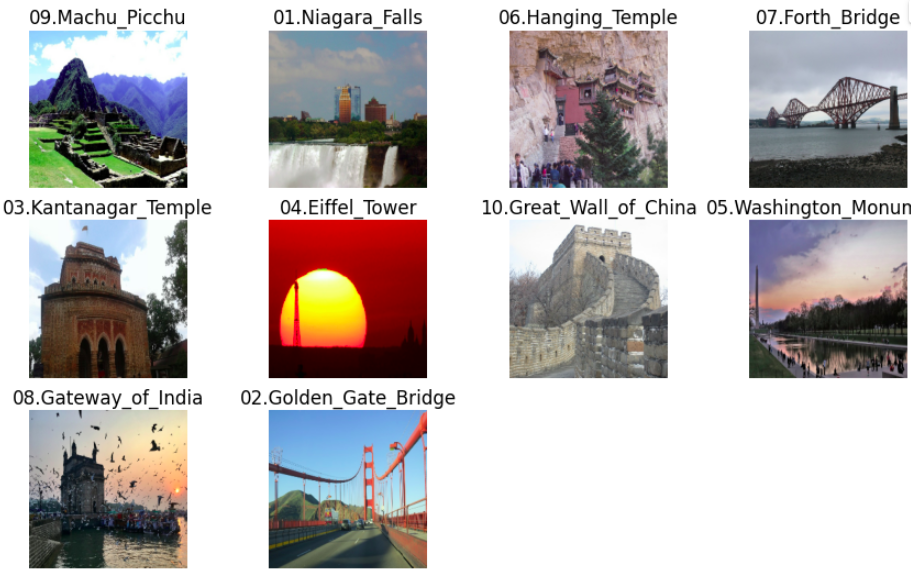

The dataset is obtained by downloading the images of the 10 famous landmark from Google search. Using these images, a CNN model has to be trained.

For inference, the CNN model will be fed with an image and the most probable landmark should be obtained as output.

# What Should Be The Performance Metric?
Accuracy would serve as a good performance metric. It is obtained by dividing the number of correct predictions by the total number of samples.

# Importing Python Packages

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import glob
import warnings

In [2]:
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
tf.keras.utils.set_random_seed(111)
warnings.filterwarnings("ignore")

# Importing The Dataset And Preprocessing

### What kind of preprocessing needs to be applied?
- Normalize images such that the range is between 0 and 1, instead of 0 and 255.
- Resize images to (227, 227, 3).

In [3]:
# importing the dataset
train_data = tf.keras.utils.image_dataset_from_directory("new_landmark_images/train/", shuffle = True, seed = 123, image_size = (227, 227), batch_size = 32)
val_data = tf.keras.utils.image_dataset_from_directory("new_landmark_images/validation/", shuffle = True, seed = 123, image_size = (227, 227), batch_size = 32)
test_data = tf.keras.utils.image_dataset_from_directory("new_landmark_images/test/", shuffle = True, seed = 123, image_size = (227, 227), batch_size = 32)

Found 737 files belonging to 10 classes.
Found 155 files belonging to 10 classes.
Found 43 files belonging to 10 classes.


In [4]:
# preprocessing
data_preprocessing = tf.keras.Sequential(
    name = "data_preprocessing",
    layers = [tf.keras.layers.Rescaling(1.0/ 255)]
)

train_ds = train_data.map(lambda x, y: (data_preprocessing(x), y))
val_ds = val_data.map(lambda x, y: (data_preprocessing(x), y))
test_ds = test_data.map(lambda x, y: (data_preprocessing(x), y))

# Visualizing Samples Of The Data

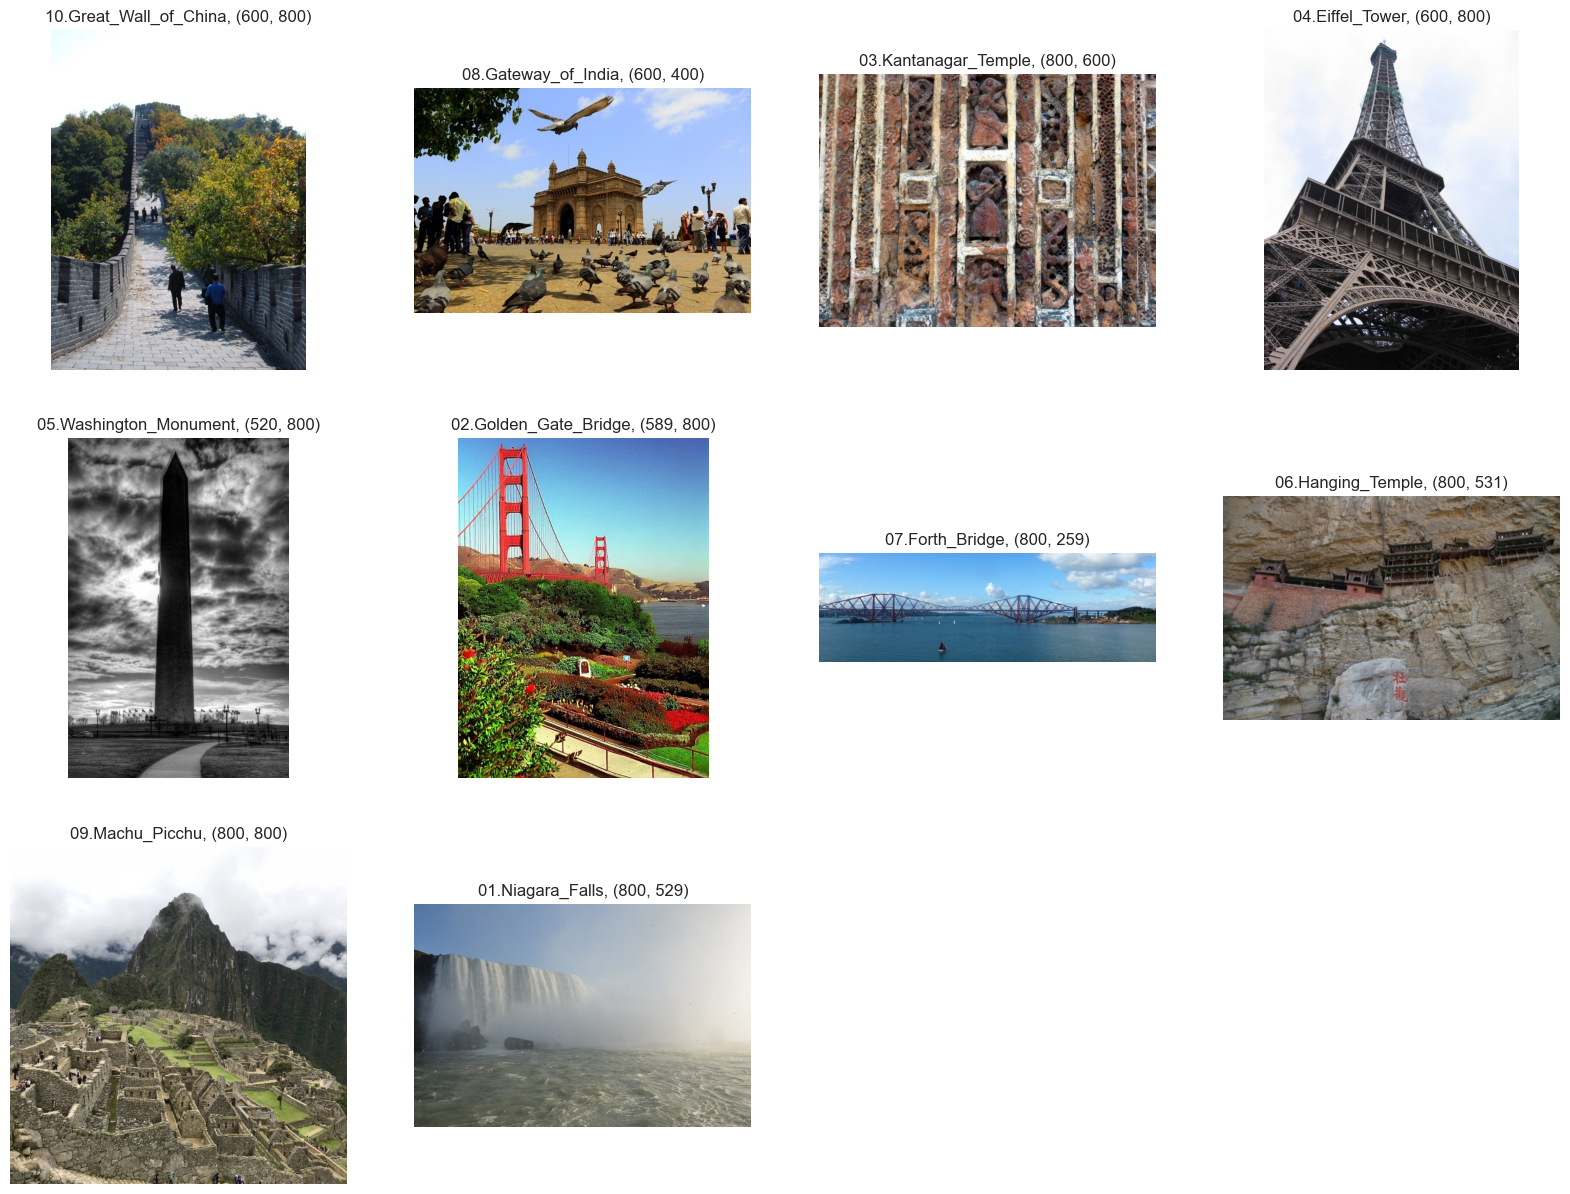

In [5]:
# list all the files inside the train directory
class_dirs = os.listdir("new_landmark_images/train/")
# dictionary to store the image array (key) for every class (value)
image_dict = {}
# dictionary to store the count of files (key) for every class (value)
count_dict = {}

# iterate through all the elements in class_dir
for cls in class_dirs:
    # create a list of all the paths in the sub-directory
    file_paths = glob.glob(f"new_landmark_images/train/{cls}/*")
    # count the number of files in each class and add it to count_dict
    count_dict[cls] = len(file_paths)
    # select a random item from the list of image paths
    image_path = random.choice(file_paths)
    # load the image using keras utility function and save it in image_dict
    image_dict[cls] = tf.keras.utils.load_img(image_path)

# visualize a random sample from each class
plt.figure(figsize = (20, 15))
# iterate through the dictionary items (class_label, image_dict)
for i, (cls, img) in enumerate(image_dict.items()):
    ax = plt.subplot(3, 4, i + 1)
    # plot each image
    plt.imshow(img)
    # set class name along with image size as the title
    plt.title(f"{cls}, {img.size}")
    plt.axis("off")

# Checking For Data Imbalance

In [6]:
# creating a DataFrame of all the classes in training dataset along with their counts
df_count_train = pd.DataFrame(
    {
        "class": count_dict.keys(),
        "count": count_dict.values()
    }
)

df_count_train

,class,count
0,10.Great_Wall_of_China,72
1,08.Gateway_of_India,87
2,03.Kantanagar_Temple,88
3,04.Eiffel_Tower,64
4,05.Washington_Monument,83
5,02.Golden_Gate_Bridge,70
6,07.Forth_Bridge,82
7,06.Hanging_Temple,70
8,09.Machu_Picchu,55
9,01.Niagara_Falls,66


<Axes: title={'center': 'Count per class in training dataset'}, xlabel='class'>

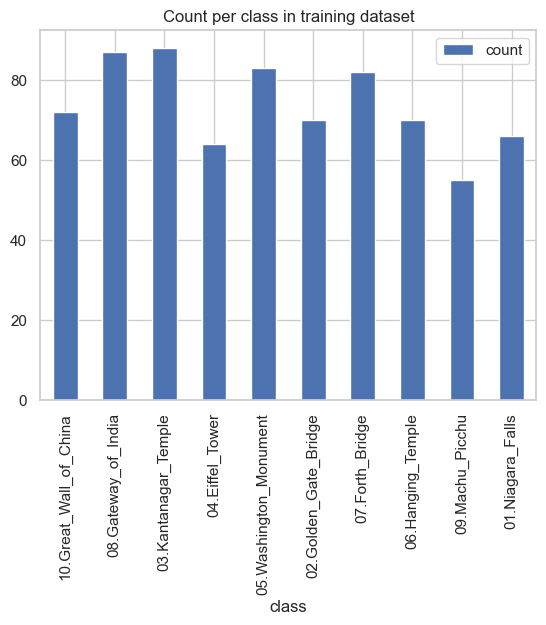

In [7]:
# plotting the data distribution of classes in the training dataset
df_count_train.plot.bar(x = "class", y = "count", title = "Count per class in training dataset")

In [8]:
# number of classes
len(count_dict.keys())

10

In [9]:
# names of the classes
for i in train_data.class_names:
    print(i)

01.Niagara_Falls
02.Golden_Gate_Bridge
03.Kantanagar_Temple
04.Eiffel_Tower
05.Washington_Monument
06.Hanging_Temple
07.Forth_Bridge
08.Gateway_of_India
09.Machu_Picchu
10.Great_Wall_of_China


Each class in the train dataset has about 70 images.

The same can be repeated for validation and test dataset as well.

Results,
- Each class in the validation dataset has about 15 images.
- Each class in the test dataset has about 5 images.

# How To Carry Out The Task Of Object Classification?
1. Create a CNN model from scratch to classify images.
2. Use Transfer Learning to apply the above model to classify the monument images.

# Creating A New Model
A Convilutional Neural Network (CNN) model can be built from scratch and can be used to classify the data.

The following are a few questions to keep in mind,
- How many `Convilutional` layer will be needed?
- What architecture should be chosen?
- How should the CNN/ Pooling/ Fully Connected layer be combined such that the best performance is obtained?
- What type of Kernel should be used `3x3`, `5x5` or `11x11`?
- Can high Accuracy be obtained if the dataset is small in size?

All the questions above prove that, a lot of experimentation will be required to obtain a model with very high Accuracy. Also, training a deep NN will require a lot of time.

Hence, instead of going through the whole of the above process from scratch, state-of-the-art models like VGGNet will be used. These models will be trained from scratch.

Prior to understanding VGGNet, AlexNet has to be understood.

# AlexNet
AlexNet is a CNN architecture designed by Alex Krizhevsky in collaboration witl Ilya Stutskerver and Geoffrey Hinton, who was Krizhevsky's Ph.D advisor at University of Toronto in 2012. It had 60 million parameters and 650,000 Neurons.

The original paper's primary result was that the depth of the model was essential for its high performance, which was computationally expensive, but made feasible due to the utilization of GPUs during training.

The 3 formed the team "SuperVision" and submitted AlexNet in the ImageNet Large Scale Visual Recognition Challenge on September 30, 2012. The network achieved a Top-5 Error of 15.3% and Top-5 Accuracy of 84.7%, which is more than 10.8% better than that of the runner-up.

The architecture influenced a large number of subsequent work in Deep Learning, especially in applying Neural Networks to Computer Vision.

### What is ImageNet competition?
The ImageNet project is a large visual database designed for use in visual object recognition software research. More than 14 million images have been hand-annotated by the project to indicate what objects are pictured and in at least one million of the images, bounding boxes are also provided. ImageNet contains more than 20000 categories, with a typical category, such as "balloon" or "strawberry", consisting of several hundred images. The database of annotations of third-party image URLs is freely available directly from ImageNet, though the actual images are not owned by ImageNet. Since 2010, the ImageNet project runs an annual software contest, the ImageNet Large Scale Visual Recognition Challenge (ILSVRC), where software programs compete to correctly classify and detect objects and scenes. The challenge uses a "trimmed" list of 1 thousand non-overlapping classes.

Further reading:
- https://www.image-net.org/challenges/LSVRC/
- https://devopedia.org/imagenet
- https://wordnet.princeton.edu

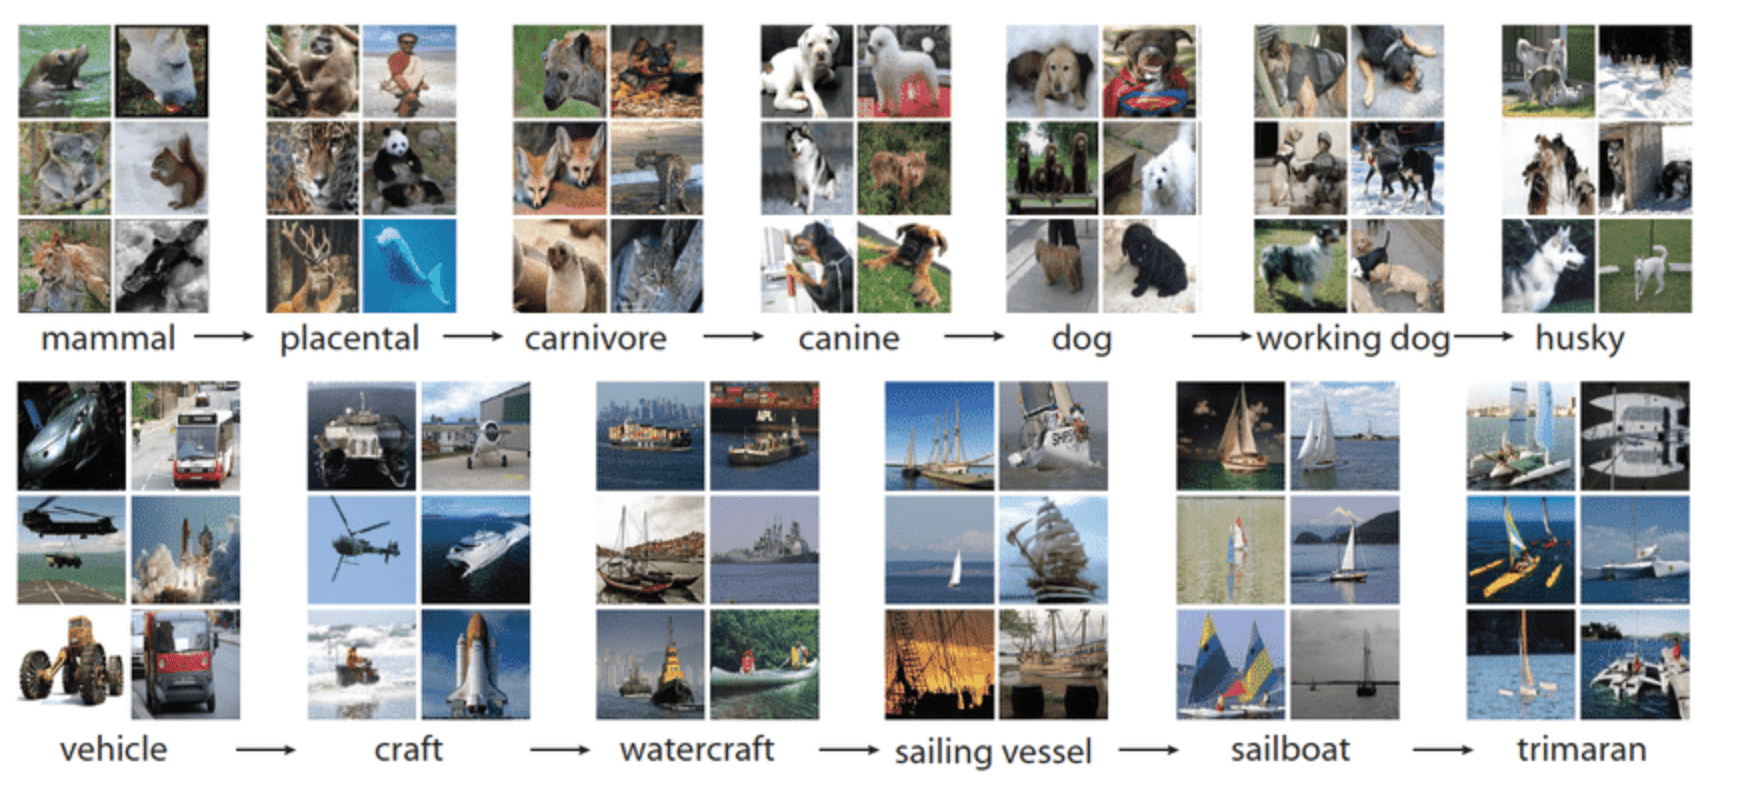

### What is Top-K Accuracy?
In multi-class classification problems, expecially in domains like Computer Vision and Recommendation Systems, traditional Accuracy might not always provide a complete picture of a model's performance. This is where Top-K Accuracy comes into play.

Instead of simply chacking if the model's top prediction matches the true label, Top-K Accuracy considers the model's top K predictions. If the true label appears anywhere within these top K prediction, the prediction is considered to be correct.

The following are the reasons it is useful,
1. Handles ambiguity: In many real-world scenarios, there might be multiple correct or highly plausible answers. Top-K Accuracy accounts for this ambiguity, providing a more realistic evaluation.
2. Relevance in specific domains:
    - Image recognition: A model might not perfectly identify a specific breed of dog but could correctly classify it as a canine.
    - Recommendation systems: Users might be interested in multiple products, not just the single top recommendation.

In essence, Top-K Accuracy provides a more nuanced assessment of a model's performance, especially in scenarios where multiple correct or highly relevant answers are acceptable.

| true_label | top_3_predicted_labels | correct |
| :-: | :-: | :-: |
| Cat | Cat, Lion, Dog | Yes |
| Dog | Giraffe, Lion, Cat | No |
| Lion | Cat, Lion, Dog | Yes |
| Giraffe | Giraffe, Dog, Cat | Yes |
| Dolphin | Dolphin, Cat, Giraffe | Yes |

### How is Top-K Accuracy helpful while working with images?
Top-K Accuracy is incredibly helpful when working with images, especially in scenarios with,
- Fine-grained classes:
    - Distinguishing between similar classes like "pick-up truck" and "minivan" can be challenging even for humans.
    - Top-K Accuracy acknowledges that the model might get close, placing the correct class within its top predictions.
- Subjective labeling:
    - Human annotators can have varying interpretations of image content.
    - For example, is a particular dog breed a "Golden Retriever" or a "Golden Doodle"?
    - Top-K Accuracy provides a more lenient evaluation when slight variations in labeling are expected.
- Noisy labels:
    - Datasets might contain mislabeled images due to human error or data collection issues.
    - Top-K Accuracy can help mitigate the impact of these noisy labels.

Key advantages of Top-K Accuracy in image classification are,
- Robustness to noise: More tolerant of minor labeling inconsistencies.
- Handles ambiguity: Acknowledges that multiple classes might be plausible for a given image.
- Better reflects human performance: Humans often do not always provide a single, perfectly accurate label.

For example, imagine a model classifying images of bird species,
- Traditional Accuracy: Requires the model to predict the exact bird species.
- Top-5 Accuracy: Considers the prediction correct if the true bird species is within the model's top 5 predictions.

This allows for some flexibility in model's predictions, making the evaluation more realistic and less sensitive to minor variations in appearance or labeling.

### What was so new about AlexNet?
AlexNet was a groundbreaking CNN that significantly advanced the field of Deep Learning. The following were the key innovations,
1. GPU acceleration:
    - Pioneering use: AlexNet was one of the first Deep Learning models to effectively leverage the power of GPUs for training.
    - Parallel processing: GPUs excel at parallel computations, which are crucial for training Deep Neural Networks with millions of parameters. By utilizing GPUs, AlexNet dramatically reduced the training time, making it feasible to train deeper and more complex models.
2. ReLU activation: 
    - Overcoming vanishing gradients: ReLU (Rectified Linear Unit) replaced traditional activation functions like Sigmoid and TanH. ReLU introduces non-linearity while being computationally more efficient. Importantly, it helps mitigate the "vanishing gradient problem", where gradients diminish rapidly during backpropagation in Deep Network, hindering effective training.
3. Data augmentation: 
    - Enhancing generalization: AlexNet employed data augmentation techniques such as random cropping, horizontal flipping and color jittering. This artifically increased the size of the training dataset, improving the model's ability to generalize to unseen data and reducing overfitting.
4. Dropout regularization:
    - Preventing overfitting: Dropout randomly deactivates a fraction of Neurons during training. This techniques prevents complex co-adaptations among Neurons, making the model more robust and less prone to overfitting.
5. Deeper architecture:
    - Increased model capacity: AlexNet consisted of eight layers, including convolution layers, pooling layers and fully connected layers. This deeper architecture allowed the model to learn more complex and hierarchical representation of images, leading to improved performance.

### Architecture of AlexNet
The following is the image showing architecture AlexNet,

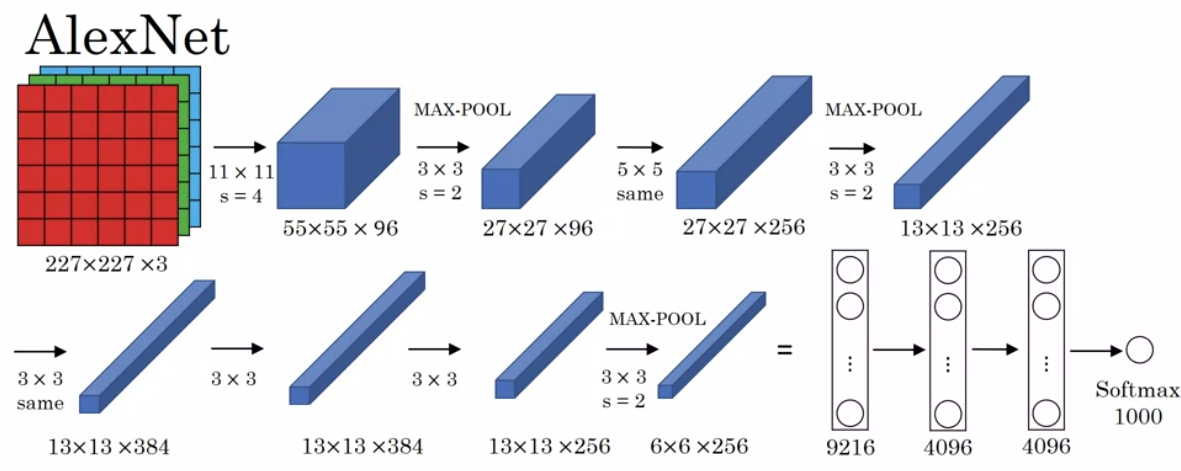

The following is the image showing the AlexNet layers computation,

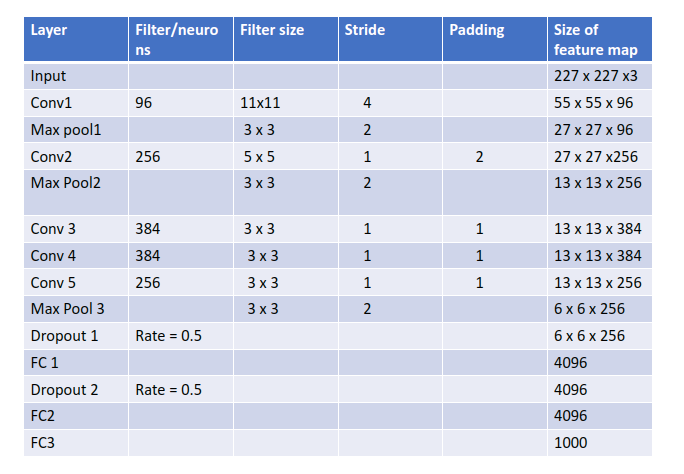

AlexNet has 5 `Convolutional` layers, 3 Fully Connected layers and 60 million parameters.

The following table contains the performance of AlexNet on ImageNet dataset,

| Model Name | Number Of Parameters | Top 1 Accuracy | Top 5 Accuracy |
| :-: | :-: | :-: | :-: |
| AlexNet | 60,000,000 | 63.3% | 84.7% |

### Shortcomings of AlexNet
1. Limited depth:
    - Expressiveness:
        - A single Neural Network layer with a linear activation function can only learn linear relationships.
        - Non-linear activation functions (like ReLU) are crucial for learning complex patterns in data.
        - Stacking multiple layers with non-linear activations allows the network to learn increasingly complex and hierarchical representations of the input data.
        - Each successive layer builds upon the features learned by previous layers, enabling the network to capture intricate relationships and patterns.
    - Perceptive field:
        - A single convolutional layer with a large filter size (like `128x128`) would be required to capture a feature spanning a large area of the image.
        - This would lead to an extremely large number of parameters, making the model computationally expensive and prone to overfitting.
        - Stacking multiple layers of smaller filters (e.g., `3x3`) achieves the same receptive field with significantly fewer parameters.
        - for example, 2 consecutive `3x3` `Convolutional` layers have an effective receptive field of `5x5` and 3 layers have a receptive field of `7x7`. This hierarchical approach allows the network to learn increasingly complex features at different scales.
    - Generalization:
        - A very deep single-layer network with a large number of parameters is prone to overfitting.
        - It might memorize the training data instead of learning generalizable features.
        - Deeper architecture with multiple layers encourage the network to learn a hierarchical representation of features.
        - Lower layers might learn basic features like edges and corners, while higher layers learn more complex features like shapes and objects.
        - This hierarchical representation helps the network generalize better to unseen data.
2. Large initial filters:
    - Computational cost:
        - Large filters like `11x11` in the initial layers require significantly more computations compared to smaller filters.
        - This increases training time and computational resources, making the model less efficient.
    - Parameter count:
        - Larger filters have a considerably higher number of parameters, which can lead to overfitting and increased memory requirements.
3. Limited performance potential:
    - While AlexNet achieved a significant breakthrough in image recognition, deeper architectures with more layers have consistently demonstrated further improvements in accuracy.
    - The increasing depth of subsequent architectures like VGGNet and ResNet has played a crucial role in pushing the boundaried of image recognition performance.

In summary, AlexNet, while groundbreaking, had limitations in terms of depth, filter sizes and computational efficiency. Subsequent research focused on addressing these limitations by exploring deeper architectures, smaller filter sizes and more efficient training techniques leading to significant advancements in the field of Deep Learning.